In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# leva slika:
x1 = np.array([815, 112, 1])
x2 = np.array([952, 163, 1])
x3 = np.array([986, 126, 1])
x4 = np.array([854, 80, 1])
x5 = np.array([791, 303, 1])
x6 = np.array([913, 358, 1])
x7 = np.array([950, 318, 1])
# x8 je nevidljiva
x9 = np.array([322, 345, 1])
x10 = np.array([454, 368, 1])
x11 = np.array([509, 272, 1])
x12 = np.array([388, 248, 1])
x13 = np.array([364, 558, 1])
x14 = np.array([478, 582, 1])
x15 = np.array([526, 486, 1])
# x16 je nevidljiva
x17 = np.array([137, 551, 1])
x18 = np.array([434, 761, 1])
x19 = np.array([817, 384, 1])
x20 = np.array([549, 251, 1])
x21 = np.array([174, 655, 1])
x22 = np.array([449, 860, 1])
x23 = np.array([806, 489, 1])
# x24 je nevidljiva

In [3]:
# desna slika:
y1 = np.array([912, 445, 1])
y2 = np.array([812, 559, 1])
y3 = np.array([918, 611, 1])
y4 = np.array([1014, 491, 1])
# y5 je nevidljiva
y6 = np.array([772, 769, 1])
y7 = np.array([864, 823, 1])
y8 = np.array([956, 702, 1])
y9 = np.array([296, 74, 1])
y10 = np.array([252,  119,  1])
y11 = np.array([371,  137,  1])
y12 = np.array([414,  88,  1])
# y13 je nevidljiva
y14 = np.array([287,  324,  1]) 
y15 = np.array([397,  342,  1])
y16 = np.array([433,  288,  1])
# y17 je nevidljiva
y18 = np.array([135,  319,  1])
y19 = np.array([527,  529,  1])
y20 = np.array([744,  348,  1])
# y21 je nevidljiva
y22 = np.array([162,  425,  1])
y23 = np.array([538,  642,  1])
y24 = np.array([733,  454,  1])

In [4]:
# 8 tacaka na osnovu kojih se odredjuje fundamentalna matrica F:
x = np.array([x1, x2, x3, x4, x6, x7, x9, x10])
y = np.array([y1, y2, y3, y4, y6, y7, y9, y10])

In [5]:
# funkcija koja pravi jednu jednacinu: yT F x = 0
def jednacina(x, y):
    a1 = x[0]
    a2 = x[1]
    a3 = x[2]
    b1 = y[0]
    b2 = y[1]
    b3 = y[2]
    
    return np.matrix([[a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3]])

In [6]:
# matrica 8x9 koja predstavlja 8 jednacina dobijenih iz korespodencija:
matrica = jednacina(x[0], y[0])
n = len(x)
for i in range(1, n):
    tmp = jednacina(x[i], y[i])
    matrica = np.concatenate((matrica, tmp), axis=0)

In [7]:
# svd dekompozicija matrice:
U, D, Vt = la.svd(matrica)

# F je poslednja kolona V:
F = Vt[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)

Fundamentalna matrica F:
 [[-6.31881248e-06 -6.22650639e-06  1.89230982e-03]
 [ 2.25207589e-07 -4.71362907e-06  7.91632362e-03]
 [-7.11139610e-04 -1.63428346e-03  9.99965287e-01]]


In [8]:
def test(x, y):
    tmp = np.dot(np.dot(y, F), x)
    return tmp[0, 0]

In [9]:
# provera uslova za svih 8 tacaka:
list = []
for i in range(len(x)):
    element = test(x[i], y[i])
    list.append(element)
    
print("Provera:\n", list)
print()
print("det(F):\n", la.det(F))

Provera:
 [0.0, -1.509903313490213e-14, -3.197442310920451e-14, -3.6415315207705135e-14, 4.440892098500626e-14, 2.842170943040401e-14, 1.3322676295501878e-15, 4.574118861455645e-14]

det(F):
 -2.255080397525935e-11


In [10]:
# e1 se dobije iz: F e1 = 0 
U, D, Vt = la.svd(F)

e1 = Vt[-1] 
print("e1:\n", e1)

e1 = e1 / e1[0, 2]
print("afine koordinate e1:\n", e1)

e1:
 [[ 7.56046527e-01 -6.54517659e-01 -5.32020418e-04]]
afine koordinate e1:
 [[-1.42108555e+03  1.23024914e+03  1.00000000e+00]]


In [11]:
# e2 se dobije iz: FT e2 = 0
# FT = (U D Vt)T = VtT DT UT = V Dt Ut

Ut = np.transpose(U)
e2 = Ut[-1]
print("e2:\n", e2)

e2 = e2 / e2[0, 2]
print("afine koordinate e2:\n", e2)

e2:
 [[-0.87263423 -0.48834318  0.00551737]]
afine koordinate e2:
 [[-158.16133884  -88.51017907    1.        ]]


In [12]:
# postizanje uslova det(F) = 0
D1 = np.diag([1, 1, 0]) * D
print("D1: \n", D1)

D1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.15166748e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [13]:
F1 = np.dot(np.dot(U, D1), Vt)
print("F:\n", F)
print("\nF1:\n", F1)

F:
 [[-6.31881248e-06 -6.22650639e-06  1.89230982e-03]
 [ 2.25207589e-07 -4.71362907e-06  7.91632362e-03]
 [-7.11139610e-04 -1.63428346e-03  9.99965287e-01]]

F1:
 [[-5.02695177e-06 -7.34488419e-06  1.89230891e-03]
 [ 9.48158114e-07 -5.33949517e-06  7.91632311e-03]
 [-7.11147778e-04 -1.63427639e-03  9.99965287e-01]]


In [14]:
# rekonstrukcija nevidljivih tacaka - funkcija kopirana iz prvog domaceg

def nevidljiva_tacka(A, B, C, D, A1, B1, C1):

    # paralelne ivice AA1, BB1, CC1 i DD1 seku se u P
    AA1 = np.cross(A, A1)
    BB1 = np.cross(B, B1)
    CC1 = np.cross(C, C1)
    
    P1 = np.cross(AA1, BB1)
    P2 = np.cross(AA1, CC1)
    P3 = np.cross(BB1, CC1)
    
    P = (P1 + P2 + P3) / 3
    
    # paralelne ivice BC, AD, B1C1 i A1D1 seku se u Q
    BC = np.cross(B, C)
    AD = np.cross(A, D)
    B1C1 = np.cross(B1, C1)
    
    Q1 = np.cross(BC, AD)
    Q2 = np.cross(BC, B1C1)
    Q3 = np.cross(B1C1, AD)
    
    Q = (Q1 + Q2 + Q3) / 3

    #Trazeno teme D1:
    PD = np.cross(P,D)
    A1Q = np.cross(A1,Q)
    D1 = np.cross(PD, A1Q)

    return D1 / D1[2]
     

In [15]:
x8 = nevidljiva_tacka(x1, x2, x3, x4, x5, x6, x7)
x16 = nevidljiva_tacka(x9, x10, x11, x12, x13, x14, x15)
x24 = nevidljiva_tacka(x17, x18, x19, x20, x21, x22, x23)

print("x8: ", x8)
print("x16: ", x16)
print("x24: ", x24)


x8:  [825.65868562 270.2970899    1.        ]
x16:  [419.02614085 461.57962289   1.        ]
x24:  [554.10970243 354.43570198   1.        ]


In [16]:
# oznake prate sliku
# postoje dva nevidljiva temena, za y17 se uradi gruba procena, pa se za y21 dobije preciznija
y5 = nevidljiva_tacka(y2, y3, y4, y1, y6, y7, y8)
y13 = nevidljiva_tacka(y10, y11, y12, y9, y14, y15, y16)

y17 = np.cross(np.cross(np.cross(np.cross(y19, y18), np.cross(y23, y22)), y20), np.cross(np.cross(np.cross(y20, y19), np.cross(y23, y24)), y18))
y17 = y17 / y17[2]
y17.round()

y21 = nevidljiva_tacka(y18, y19, y20, y17, y22, y23, y24)

print("y8: ", y8)
print("y16: ", y16)
print("y24: ", y24)



y8:  [956 702   1]
y16:  [433 288   1]
y24:  [733 454   1]


In [17]:
# kanonska matrica kamere za T1:
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("T1:\n", T1)

T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [18]:
# funkcija za dobijanje matrice vektorskog mnozenja sa x:
def v_matrica(x):
    p1 = x[0, 0]
    p2 = x[0, 1]
    p3 = x[0, 2]
    matrica = np.matrix([[0, -p3, p2], [p3, 0, -p1], [-p2, p1, 0]])
    return matrica

In [19]:
# racunanje matrice vektorskog mnozenja sa e2:
E2 = v_matrica(e2)
print("E2:\n", E2)

E2:
 [[   0.           -1.          -88.51017907]
 [   1.            0.          158.16133884]
 [  88.51017907 -158.16133884    0.        ]]


In [20]:
# matrica kamere T2:
T2 = np.concatenate((E2 * F1, np.transpose(e2)), axis=1)

print("E2 * F1:\n", E2 * F1)
print()
print("e2:\n", e2)
print()
print("Matrica T2:\n", T2)

E2 * F1:
 [[ 6.29428690e-02  1.44655435e-01 -8.85150229e+01]
 [-1.12481112e-01 -2.58486687e-01  1.58157741e+02]
 [-5.94898358e-04  1.94404689e-04 -1.08456766e+00]]

e2:
 [[-158.16133884  -88.51017907    1.        ]]

Matrica T2:
 [[ 6.29428690e-02  1.44655435e-01 -8.85150229e+01 -1.58161339e+02]
 [-1.12481112e-01 -2.58486687e-01  1.58157741e+02 -8.85101791e+01]
 [-5.94898358e-04  1.94404689e-04 -1.08456766e+00  1.00000000e+00]]


In [21]:
def jednacine(x, y):
    list = np.array([x[1] * T1[2] - x[2] * T1[1], -x[0] * T1[2] + x[2] * T1[0], y[1] * T2[2] - y[2] * T2[1], -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(list)

In [22]:
def afina(x):
    x = x / x[3]
    return x[:-1]

In [23]:
def _3D(x, y):
    mat = np.transpose(la.svd(jednacine(x, y))[2][3])
    koord = np.array(mat)
    return afina(koord)

In [24]:
slika_leva = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24])
slika_desna = np.array([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24])

In [25]:
rekonstruisane = []
n = len(slika_leva)
for i in range(n):
    tmp = _3D(slika_leva[i], slika_desna[i])
    rekonstruisane.append(tmp)
    print(f"rekonstrukcija {i}:\n{tmp}\n")


rekonstrukcija 0:
[[624.3031101 ]
 [ 91.39640931]
 [  0.76179658]]

rekonstrukcija 1:
[[698.42087384]
 [125.65104115]
 [  0.73010438]]

rekonstrukcija 2:
[[699.8518311 ]
 [ 96.00612343]
 [  0.70606592]]

rekonstrukcija 3:
[[632.54398356]
 [ 65.38662527]
 [  0.73629412]]

rekonstrukcija 4:
[[618.91692752]
 [241.04616548]
 [  0.7797027 ]]

rekonstrukcija 5:
[[686.94575264]
 [273.61456924]
 [  0.75016987]]

rekonstrukcija 6:
[[692.20557801]
 [236.49170595]
 [  0.72617012]]

rekonstrukcija 7:
[[626.84776166]
 [209.51685455]
 [  0.75634242]]

rekonstrukcija 8:
[[430.50815639]
 [461.36856619]
 [  1.33660153]]

rekonstrukcija 9:
[[585.35035587]
 [475.33341008]
 [  1.28790278]]

rekonstrukcija 10:
[[560.55994893]
 [301.47056109]
 [  1.09862275]]

rekonstrukcija 11:
[[446.17433013]
 [286.81241322]
 [  1.14625971]]

rekonstrukcija 12:
[[437.36316137]
 [670.15030307]
 [  1.20232133]]

rekonstrukcija 13:
[[549.18497148]
 [669.0716296 ]
 [  1.14843592]]

rekonstrukcija 14:
[[546.16078754]
 [505.541

In [26]:
# nije radjena normalizacija, treca koordinata je bila znacajno manja pa je treba pomnoziti
dijagonalna = np.eye(3)
dijagonalna[2][2] = 400
rekonstruisane_p = np.zeros((24, 3))
print("popravljene rekonstruisane koordinate:")
for i in range(len(rekonstruisane)):
    rekonstruisane_p[i] = dijagonalna.dot(rekonstruisane[i][:,0])
    print(rekonstruisane_p[i])

popravljene rekonstruisane koordinate:
[624.3031101   91.39640931 304.71863174]
[698.42087384 125.65104115 292.0417527 ]
[699.8518311   96.00612343 282.42636751]
[632.54398356  65.38662527 294.51764811]
[618.91692752 241.04616548 311.88108102]
[686.94575264 273.61456924 300.06794875]
[692.20557801 236.49170595 290.46804978]
[626.84776166 209.51685455 302.53696689]
[430.50815639 461.36856619 534.64061135]
[585.35035587 475.33341008 515.16111331]
[560.55994893 301.47056109 439.44909833]
[446.17433013 286.81241322 458.50388498]
[437.36316137 670.15030307 480.92853184]
[549.18497148 669.0716296  459.37436864]
[546.16078754 505.54150036 414.91665556]
[454.81875408 501.54184805 433.77169319]
[180.33684133 727.00792726 529.26166461]
[ 603.29487405 1058.04191979  555.95263682]
[683.06735647 325.40552906 333.35645436]
[495.24163311 230.41768753 358.73469657]
[220.86341565 835.12476365 513.93781633]
[ 582.42512735 1113.32516403  519.55393324]
[674.57043523 411.79877411 334.22402718]
[499.8342544

In [27]:
ivice1 = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                    [5, 6], [6, 7], [7, 8], [8, 5],
                    [1, 5], [2, 6], [3, 7], [4, 8]])

ivice2 = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                    [13, 14], [14, 15], [15, 16], [16, 13],
                    [9, 13], [10, 14], [11, 15], [12, 16]])

ivice3 = np.array([[17, 18], [18, 19], [19, 20], [20, 17], 
                    [21, 22], [22, 23], [23, 24], [24, 21],
                    [17, 21], [18, 22], [19, 23], [20, 24]])

<IPython.core.display.Javascript object>


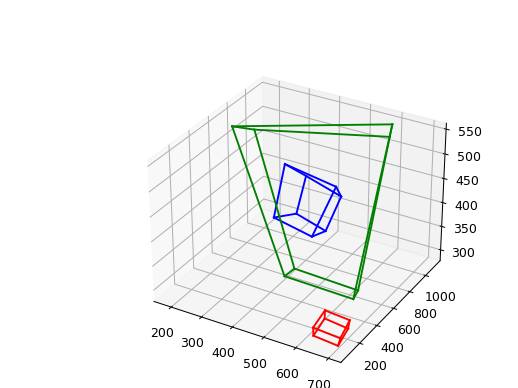

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in ivice1:
    ax.plot3D([rekonstruisane_p[ivica[0] - 1][0], rekonstruisane_p[ivica[1] - 1][0]], [rekonstruisane_p[ivica[0] - 1][1], rekonstruisane_p[ivica[1] - 1][1]], [rekonstruisane_p[ivica[0] - 1][2], rekonstruisane_p[ivica[1] - 1][2]], 'red')

for ivica in ivice2:
    ax.plot3D([rekonstruisane_p[ivica[0] - 1][0], rekonstruisane_p[ivica[1] - 1][0]], [rekonstruisane_p[ivica[0] - 1][1], rekonstruisane_p[ivica[1] - 1][1]], [rekonstruisane_p[ivica[0] - 1][2], rekonstruisane_p[ivica[1] - 1][2]], 'blue')

for ivica in ivice3:
    ax.plot3D([rekonstruisane_p[ivica[0] - 1][0], rekonstruisane_p[ivica[1] - 1][0]], [rekonstruisane_p[ivica[0] - 1][1], rekonstruisane_p[ivica[1] - 1][1]], [rekonstruisane_p[ivica[0] - 1][2], rekonstruisane_p[ivica[1] - 1][2]], 'green')
